<a href="https://colab.research.google.com/github/luizrsassi/clima-time-series/blob/main/analise_clima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Integrador 4 - UNIVESP

### Este notebook contém a análise de dados coletados por dispositivo IOT que coletou a temperatura e a umidade na cidade de Botucatu



## 1.Importando as bibliotecas



In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [69]:
sns.set_palette('Accent')
sns.set_style('darkgrid')



## 2.Carregando os dados



In [70]:
arquivo = 'clima.csv'
clima = pd.read_csv(arquivo)


## 3.Análise exploratória dos dados



In [71]:
clima.head()

,id_clima,uni_regis,data,temperatura,umidade
0,135,unidade_01,2023-03-07 21:25:19,26.3,54
1,136,unidade_01,2023-03-07 21:27:20,26.1,55
2,137,unidade_01,2023-03-07 21:29:22,26.0,55
3,138,unidade_01,2023-03-07 21:30:32,25.9,55
4,139,unidade_01,2023-03-07 21:32:37,25.7,56


---
|Nome do atributo | Descrição |
| :---: | :---: |
| id_clima | Identificador da medição realizada |
| uni_regis | Identificador do aparelho usado para coletar os dados |
| data | Instante da coleta dos dados |
| temperatura | Valor da temperatura medida em °C |
| umidade | Valor da umidade medida em % |

---



### 3.1Selecionar os atributos a serem utilizados



In [72]:
clima = pd.read_csv(arquivo, usecols=['data', 'temperatura', 'umidade'])
clima.head()

,data,temperatura,umidade
0,2023-03-07 21:25:19,26.3,54
1,2023-03-07 21:27:20,26.1,55
2,2023-03-07 21:29:22,26.0,55
3,2023-03-07 21:30:32,25.9,55
4,2023-03-07 21:32:37,25.7,56


In [73]:
clima.tail()

,data,temperatura,umidade
5555,2023-04-23 16:31:01,25.3,43
5556,2023-04-23 16:41:08,25.1,44
5557,2023-04-23 16:51:15,24.9,43
5558,2023-04-23 17:01:23,24.8,45
5559,2023-04-23 17:06:28,24.8,45


### A primeira medida foi realizada em 07/03/2023
### e a última medida foi realizada em 23/04/2023

In [74]:
clima.dtypes

data            object
temperatura    float64
umidade          int64
dtype: object

**Importante que o atributo data esteja em formato datetime**

In [75]:
clima['data'] = pd.to_datetime(clima['data'])
clima.dtypes

data           datetime64[ns]
temperatura           float64
umidade                 int64
dtype: object

In [76]:
clima.head()

,data,temperatura,umidade
0,2023-03-07 21:25:19,26.3,54
1,2023-03-07 21:27:20,26.1,55
2,2023-03-07 21:29:22,26.0,55
3,2023-03-07 21:30:32,25.9,55
4,2023-03-07 21:32:37,25.7,56


In [77]:
print('Quantidade de linhas e colunas:', clima.shape)
print('Quantidade de dados nulos:', clima.isna().sum().sum())

Quantidade de linhas e colunas: (5560, 3)
Quantidade de dados nulos: 0


### O conjunto de dados é composto por 5560 registros e não há dados nulos.

In [78]:
clima.describe().T

,count,mean,std,min,25%,50%,75%,max
temperatura,5560.0,24.080612,3.506956,13.7,21.7,23.7,26.3,34.2
umidade,5560.0,62.808993,10.971706,29.0,55.0,64.0,71.0,85.0




## 4.Visualização dos dados



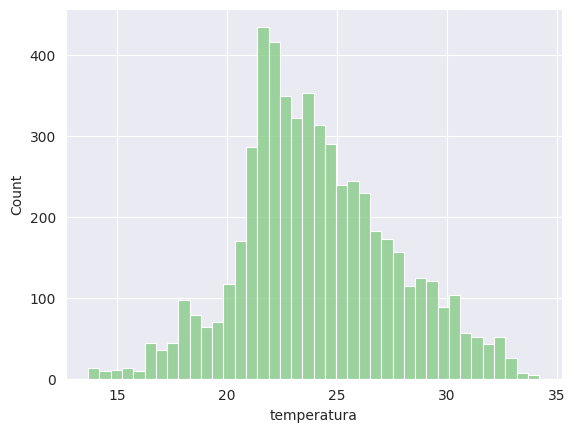

In [79]:
sns.histplot(data=clima, x='temperatura');

In [80]:
moda_temp = clima['temperatura'].mode()[0]
print("Moda da temperatura: " + str(moda_temp) + "°C")

Moda da temperatura: 21.4°C


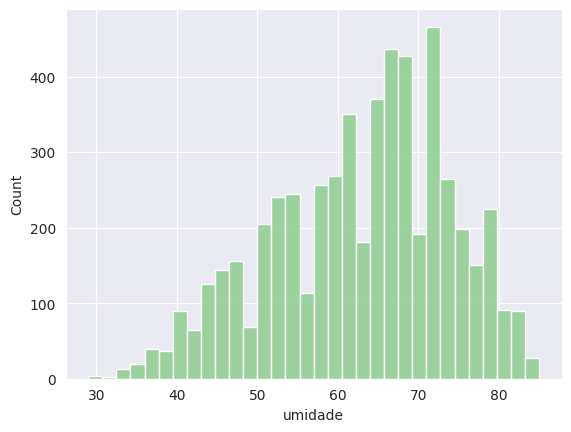

In [81]:
sns.histplot(data=clima, x='umidade');

In [82]:
moda_umid = clima['umidade'].mode()[0]
print("Moda da umidade: " + str(moda_umid) + "%")

Moda da umidade: 71%


In [83]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  ax = plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  ax = plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

In [84]:
clima['aumento_temp'] = clima['temperatura'].diff()
clima['aceleracao_temp'] = clima['aumento_temp'].diff()

In [85]:
clima['aumento_umid'] = clima['umidade'].diff()
clima['aceleracao_umid'] = clima['aumento_umid'].diff()

In [86]:
clima.head()

,data,temperatura,umidade,aumento_temp,aceleracao_temp,aumento_umid,aceleracao_umid
0,2023-03-07 21:25:19,26.3,54,NaN,NaN,NaN,NaN
1,2023-03-07 21:27:20,26.1,55,-0.2,NaN,1.0,NaN
2,2023-03-07 21:29:22,26.0,55,-0.1,0.1,0.0,-1.0
3,2023-03-07 21:30:32,25.9,55,-0.1,0.0,0.0,0.0
4,2023-03-07 21:32:37,25.7,56,-0.2,-0.1,1.0,1.0


### 4.1 Comparação da temperatura com seu aumento e aceleração

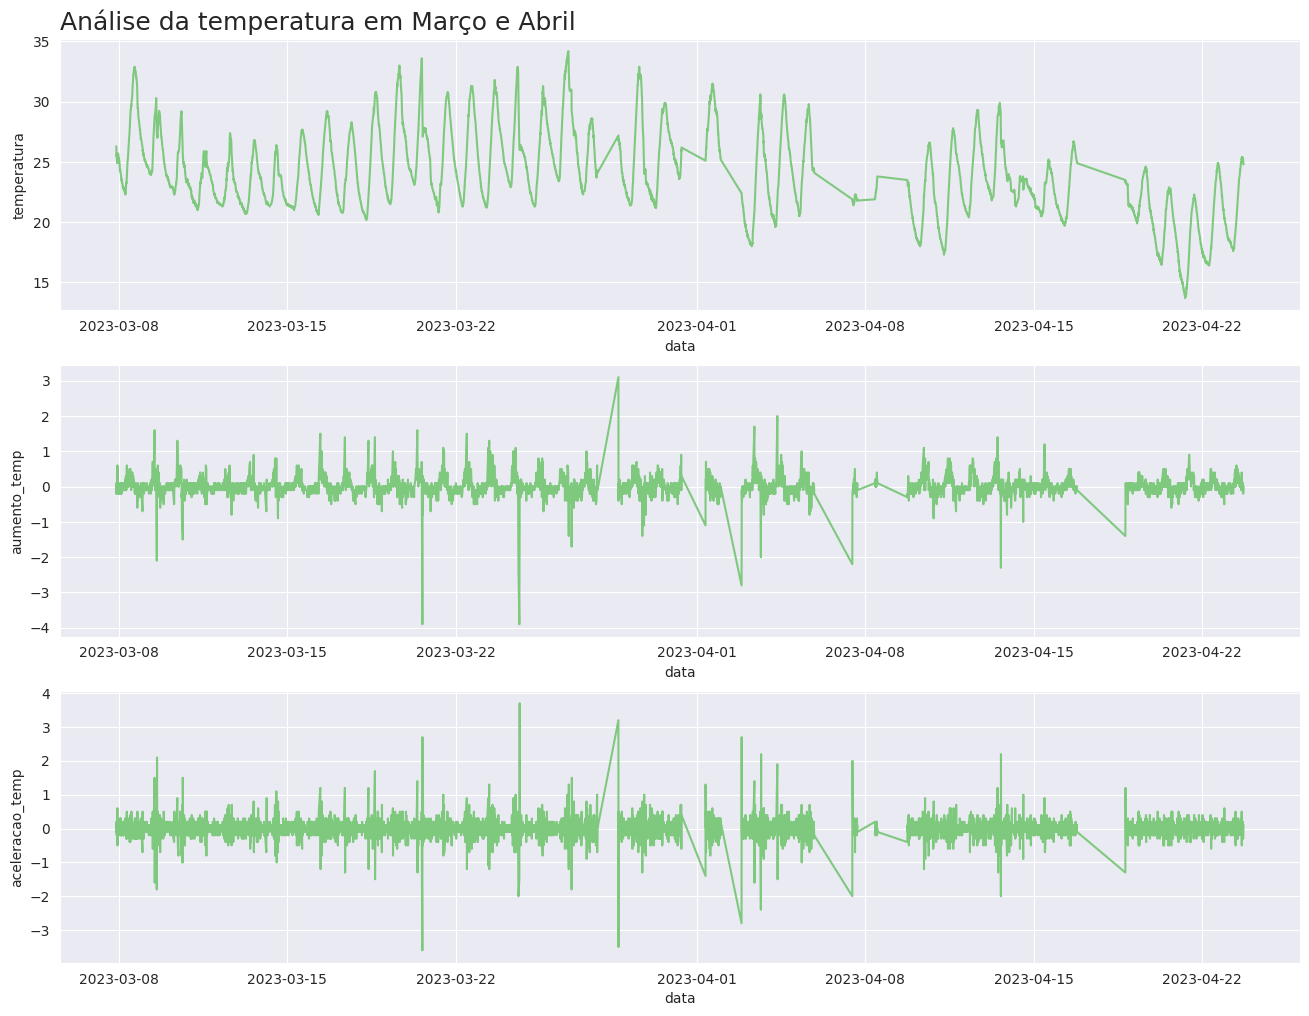

In [87]:
plot_comparacao('data', 'temperatura', 'aumento_temp', 'aceleracao_temp', clima, 'Análise da temperatura em Março e Abril')

### 4.2 Comparação da umidade com seu aumento e aceleração

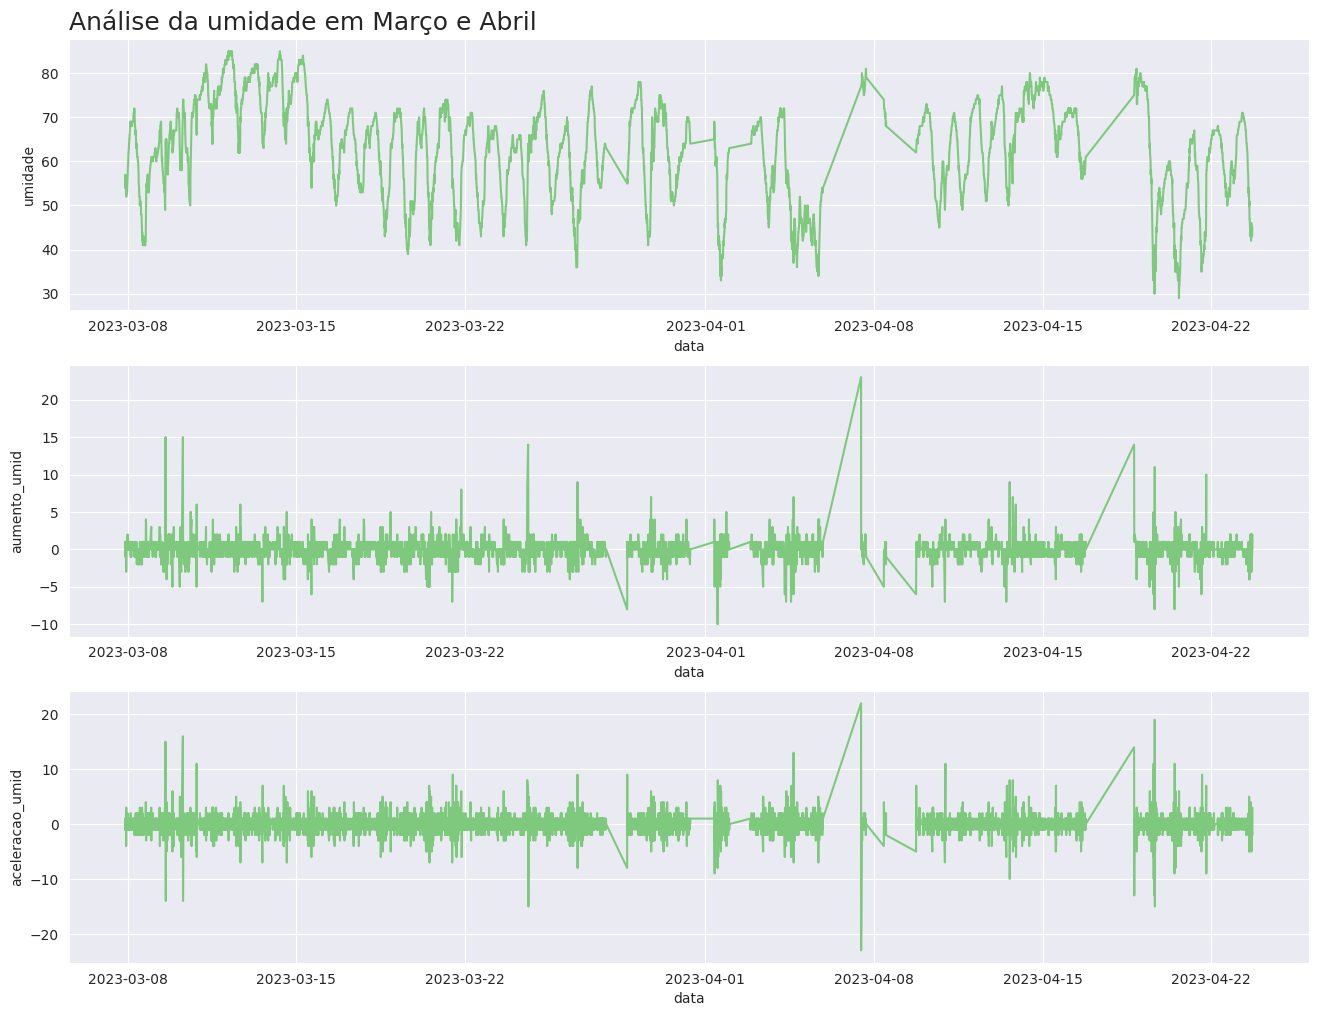

In [88]:
plot_comparacao('data', 'umidade', 'aumento_umid', 'aceleracao_umid', clima, 'Análise da umidade em Março e Abril')

### 4.3 Autocorrelação da temperatura e da umidade

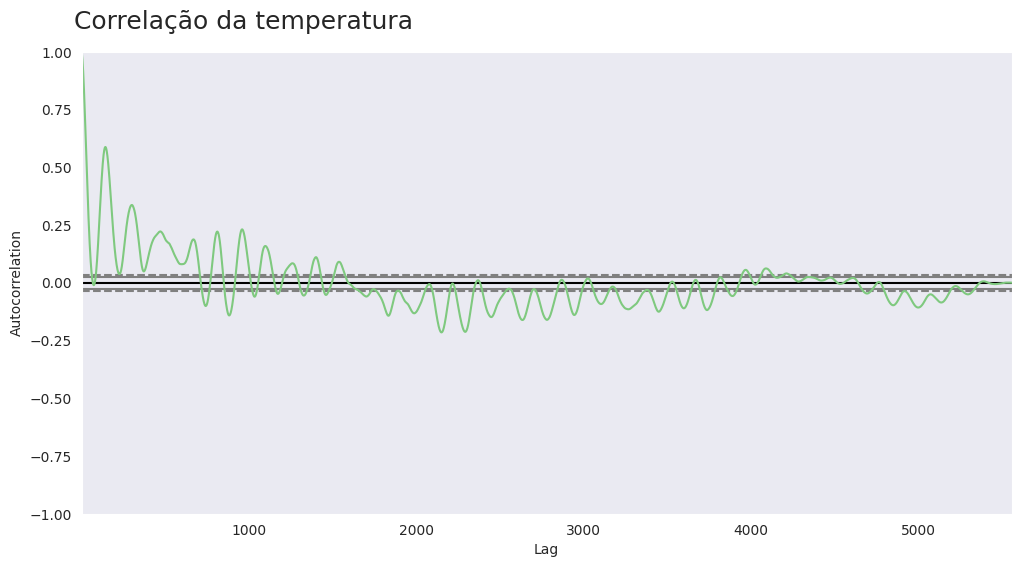

In [89]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da temperatura', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(clima['temperatura'])
ax = ax

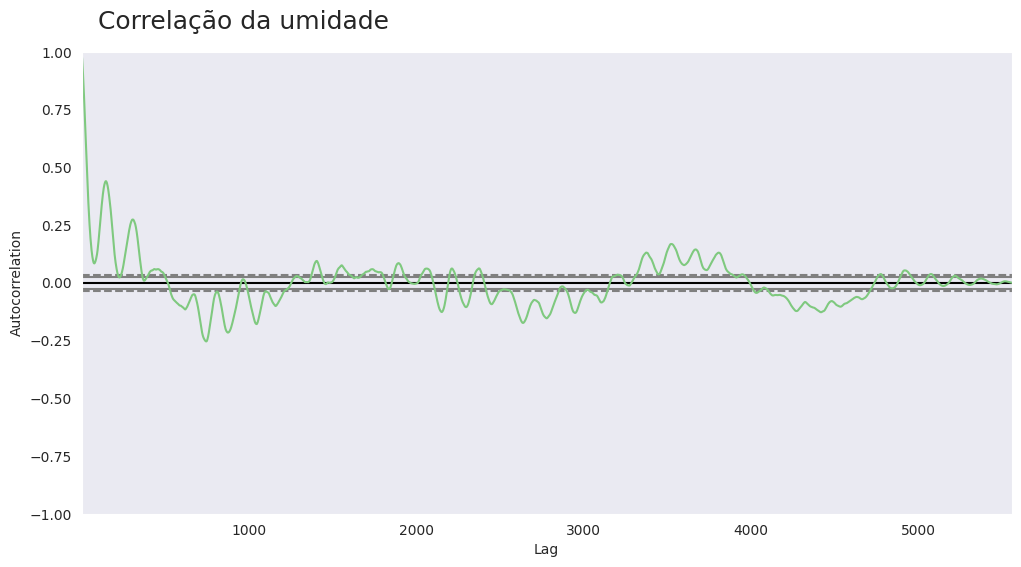

In [90]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da umidade', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(clima['umidade'])
ax = ax

### 4.4 Decomposição da temperatura

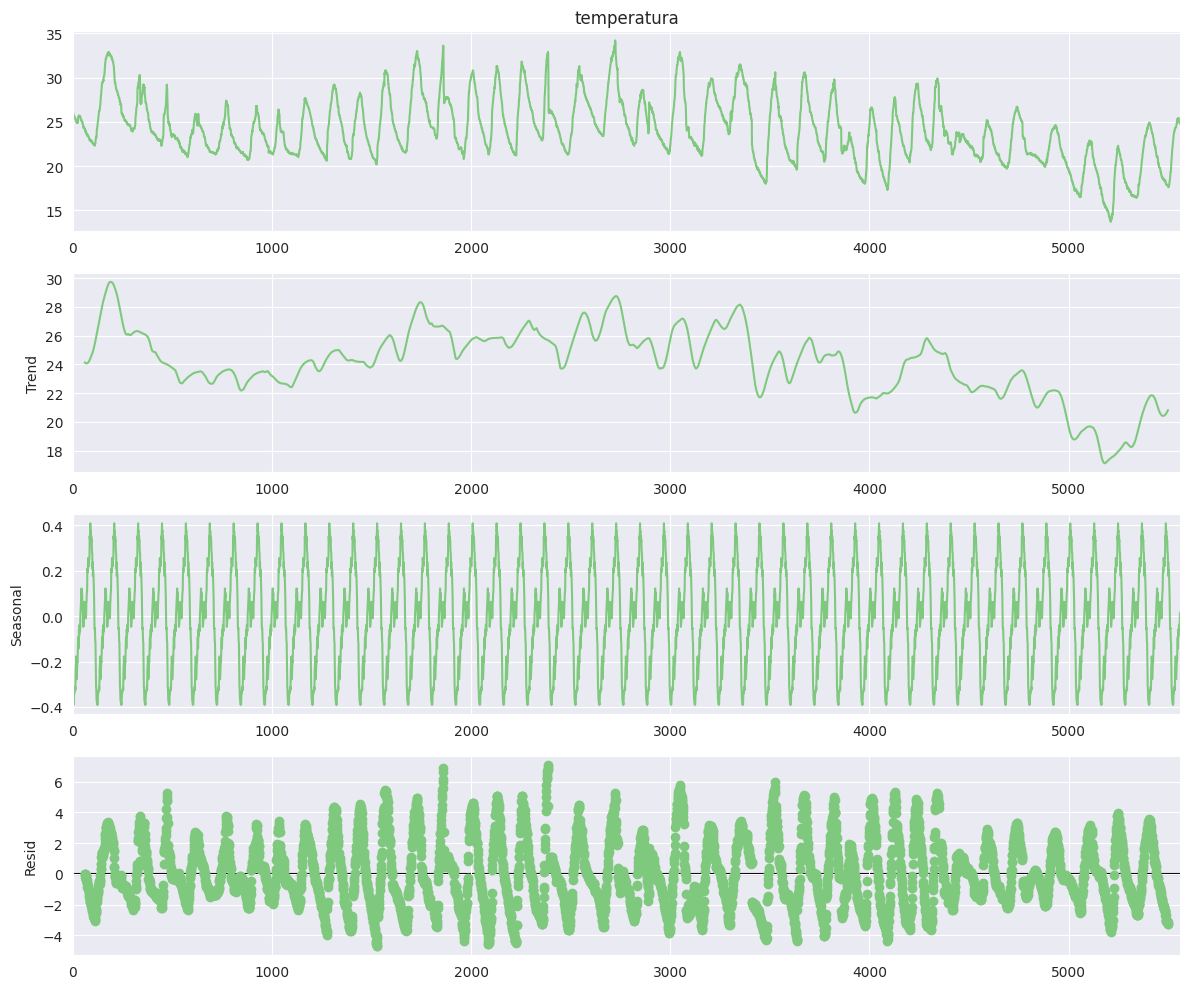

In [93]:
from pylab import rcParams 
rcParams['figure.figsize'] = (12, 10)
resultado = seasonal_decompose(clima['temperatura'], period=120) 
resultado.plot()
plt.show()

### 4.5 Decomposição da umidade

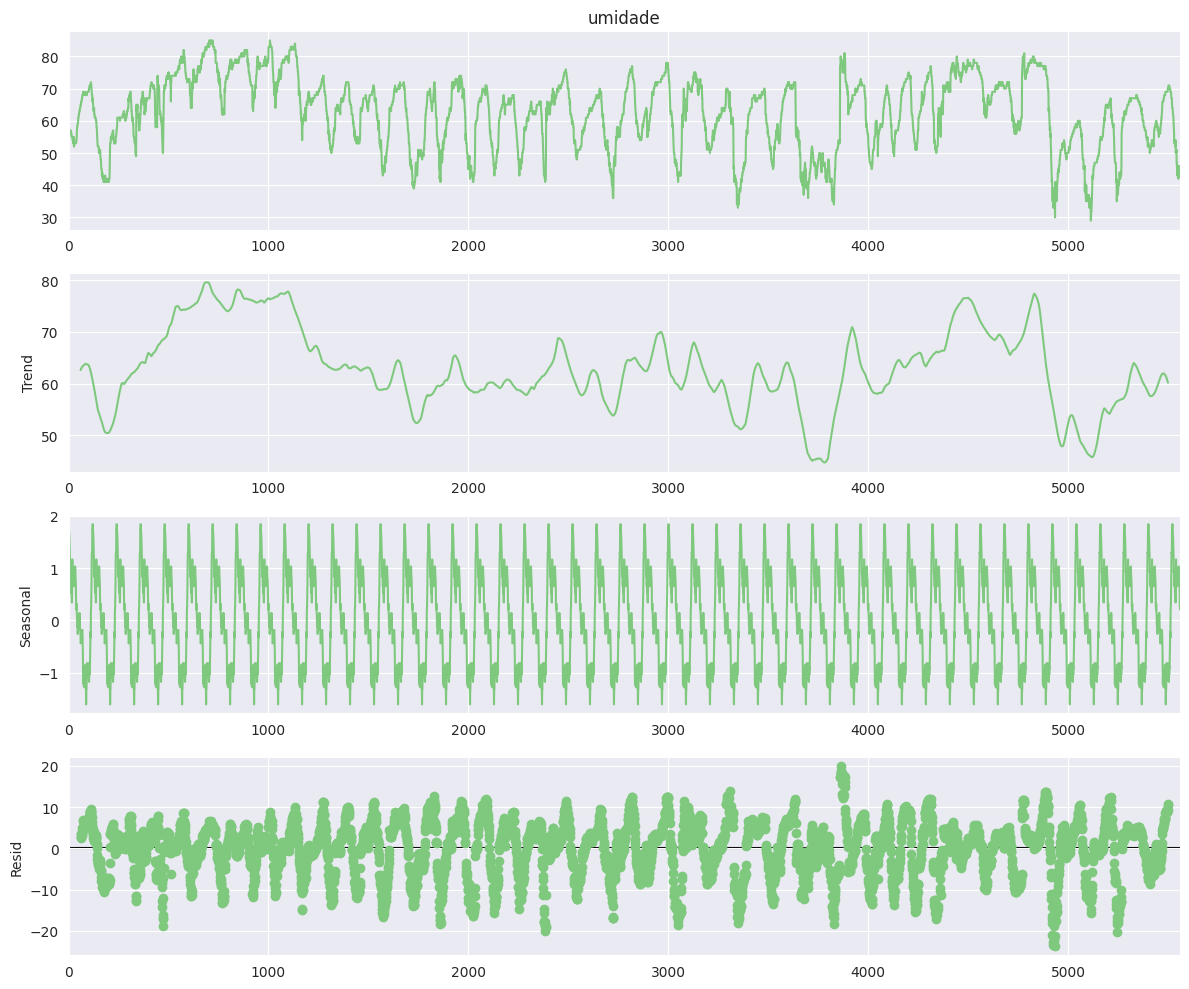

In [119]:
from pylab import rcParams 
rcParams['figure.figsize'] = (12, 10)
resultado = seasonal_decompose(clima['umidade'], period=120) 
resultado.plot()
plt.show()